In [1]:
import training.utils as ut 
import training.model as mo
from training.utils import test_transform
import pandas as pd
import torch

/Users/arthur/anaconda3/envs/trimble/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


## Import the model

In [ ]:
model= mo.model()

## Prediction Folder

,file,pred,label
0,training/dataset/test_images/10.jpeg,0,Fields
1,training/dataset/test_images/1.jpeg,0,Fields
2,training/dataset/test_images/6.jpeg,0,Fields
3,training/dataset/test_images/7.jpeg,1,Roads
4,training/dataset/test_images/8.jpeg,1,Roads
5,training/dataset/test_images/4.jpeg,0,Fields
6,training/dataset/test_images/5.jpeg,1,Roads
7,training/dataset/test_images/9.jpeg,0,Fields
8,training/dataset/test_images/2.jpeg,1,Roads
9,training/dataset/test_images/3.jpeg,1,Roads


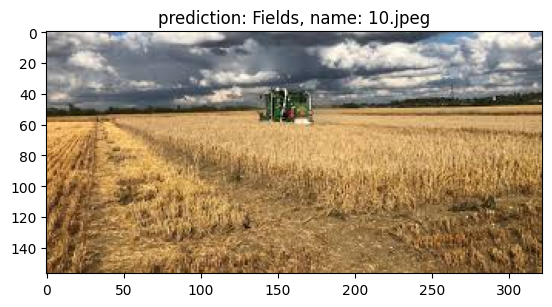

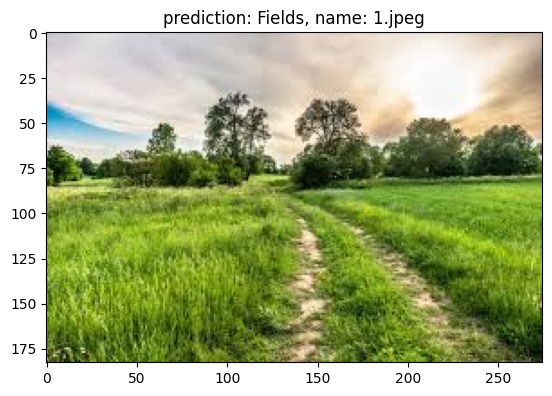

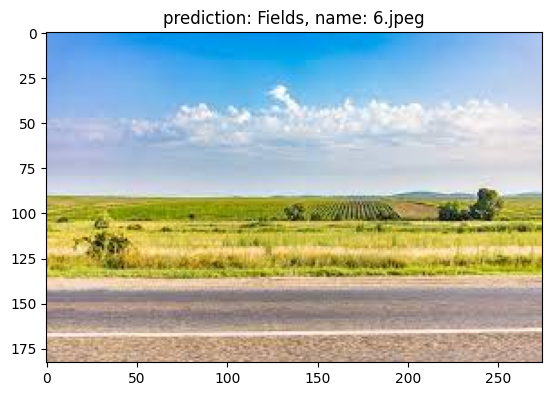

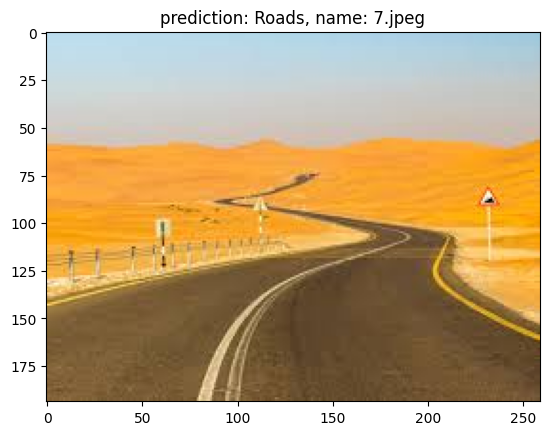

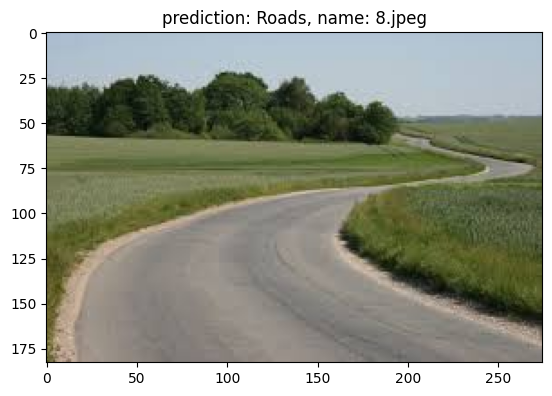

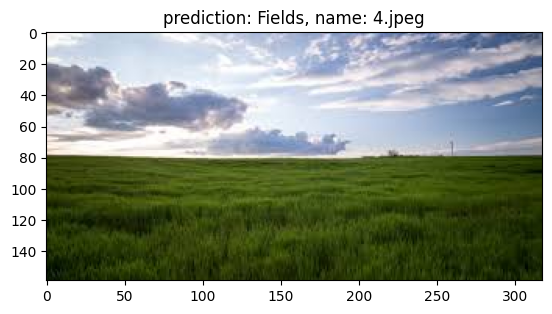

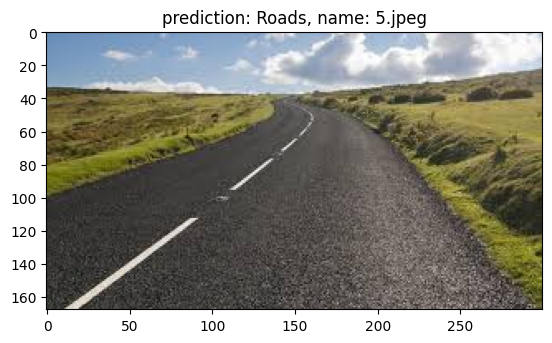

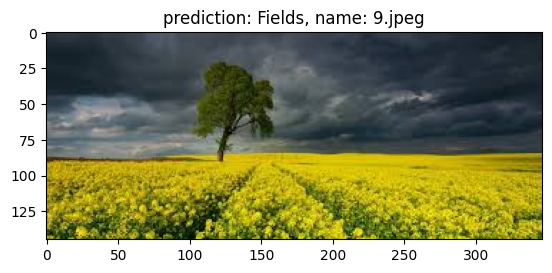

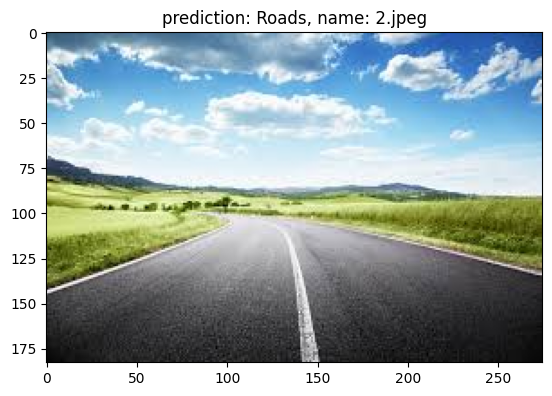

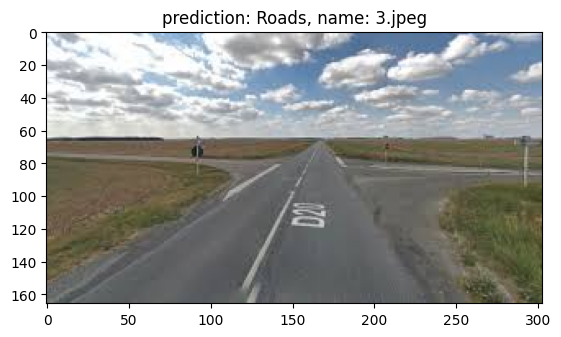

In [7]:
folder= "training/dataset/test_images"
predict_dataset = ut.CustomFolder(root=folder, transform=ut.test_transform,has_labels=False)
predict_loader= predict_dataset.predction_loader(predict_dataset )
int_pred= ut.met(model,predict_loader)
label_pred=[['Fields', 'Roads'][i] for i in int_pred]
df=pd.DataFrame([predict_dataset.image_paths,int_pred,label_pred]).T
df.columns=["file","pred","label"]
df.to_csv("output.csv")
display(df)
_plot=predict_dataset.visIm(num_images=len(label_pred),random=False,labels=label_pred)


## Prediction  File

In [5]:
path_one_image="training/dataset/test_images/1.jpeg"
predict_dataset = ut.CustomFolder(root=path_one_image, transform=ut.test_transform,has_labels=False)
proba,pred,label= predict_dataset.predict_one(model)
proba,pred,label

('0.9438', 0, 'Fields')

## Loading / preporcessing images

In [4]:
dataset = ut.CustomFolder(root="training/dataset/train_images",has_labels=True)
train_loader,val_loader,test_loader = dataset.train_loader(dataset)
len(train_loader.dataset),len(val_loader.dataset),len(test_loader.dataset)

(91, 30, 32)

## Train the Model

In [6]:
"""model= mo.Classifier(num_classes=2)
epochs=20
model,train_losses ,test_losses=mo.training(model,train_loader,val_loader,epochs=epochs)"""

'model= mo.Classifier(num_classes=2)\nepochs=20\nmodel,train_losses ,test_losses=mo.training(model,train_loader,val_loader,epochs=epochs)'

In [6]:
# Plot both training and test losses on the same plot
ut.plt_loss(train_losses,test_losses,epochs)

## predctions / metriecs / dignaistc 

############Training############
Test loss:  4.515600264072418
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.92      1.00      0.96        46

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



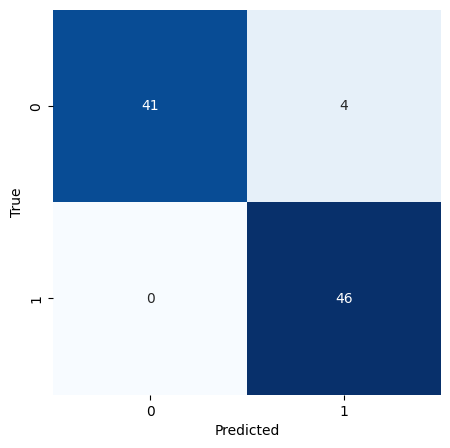

############Validation############
Test loss:  1.6212879121303558
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.95      1.00      0.98        21

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



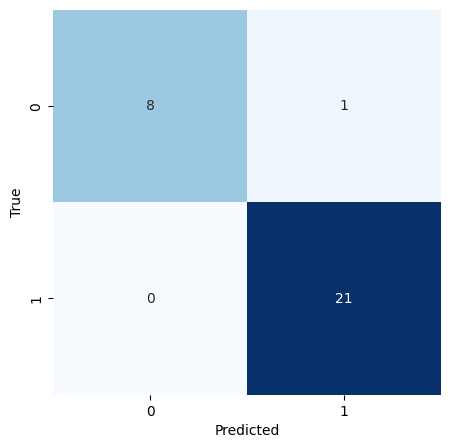

############Test############
Test loss:  1.5537241101264954
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        24

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32



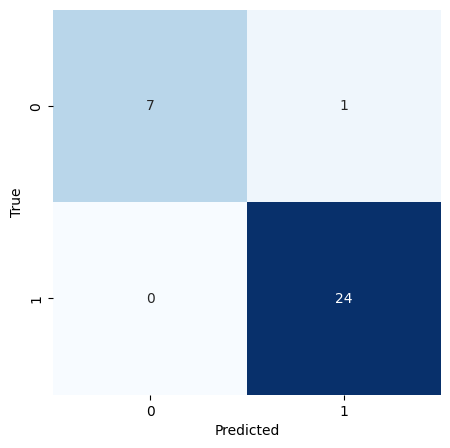

############Train############


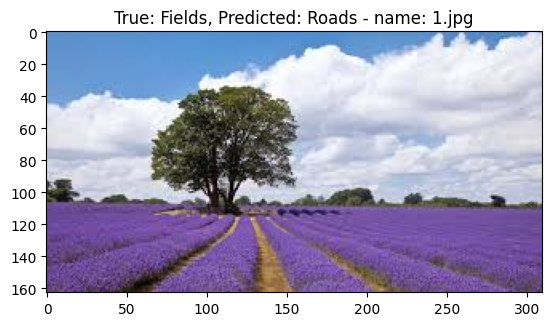

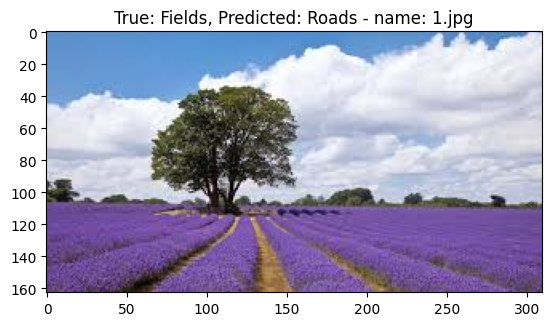

############Validation############


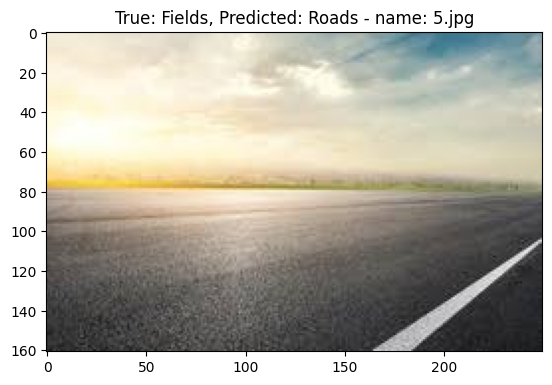

############Test############


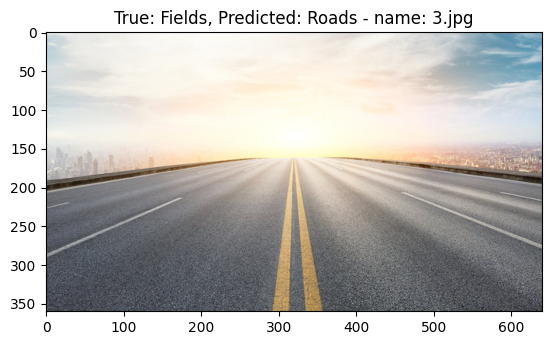

In [6]:

print("############Validation############")
outputs,f1,_=ut.met(model,val_loader,True)
print("############Test############")
outputs,f1,_=ut.met(model,test_loader,True) 


print("############Validation############")
ut.anal(model,val_loader)
print("############Test############")
ut.anal(model,test_loader)

## ML Algo

In [ ]:
X_train=[]
y_train=[]
train_loader,val_loader,
for i in train_loader:
    _,lable,pix=i
    for l,p in zip(lable,pix):
        y_train.append(l)
        X_train.append(p[:])
X_test=[]
y_test=[]
for i in val_loader:
    _,lable,pix=i
    for l,p in zip(lable,pix):
        y_test.append(l)
        X_test.append(p[:])
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)
# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='poly',C=200,random_state=22)
# Train the classifier
svm_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
